# THERE IS A BUG WITH SORTING (6/24/24)
Temporary fix has been implemented, needs to be adjusted
# VisMCAO: LGS 7 mag Study
The goal of this jupyter notebook is to produce plots of point-spread function (PSF) metrics and wave-front error (WFE) for the acutator count trade study. Refer to Overleaf for most up to date figures. The following plots are currently in this jupyter notebook. Future notebooks will contain actual PSF images as well (work in progress). 
* 10x WFE vs. Time (for each psf location)
* Radius vs. Strehl
* Radius vs. FWHM
* Radius vs. EE80
* Radius vs. WFE
* Height vs. PSF Metrics (1000 nm) and WFE (center)

## Setup

In [1]:
import pylab as plt
import numpy as np
from astropy.io import fits
import os, fnmatch
import importlib
import readbin

# Packages specific to MU Lab (all on github)
from paarti.utils import maos_utils
from paarti import psfs, psf_plots
from paarti.psf_metrics import metrics
from bpeck.mcao import act_study

## Parameters 

In [2]:
psf_x = [0, 5, 10, 15, 20, 25, 30, 35, 45, 60]  # arcsec
psf_y = [0, 0,  0,  0,  0,  0,  0,  0,  0,  0]  # arcsec
psf_wvl = [432, 544, 652, 810, 877, 1020, 1248, 1673, 2200] # nanometer

lgs = [3, 4, 5, 6, 7, 8, 9, 10]

bandpass = 3 # 1000 nanometers
seed = 1

%matplotlib inline

## Get data from directories 
Currently, this notebook can only accepts LGS 7mag values of 3, 4, 5, 6, 7, 8, 9, 10 that have the following names:
* 3lgs, 4lgs, 5lgs, 6lgs, 7lgs, 8lgs, 9lgs, 10lgs

Each of these should be full MAOS directories (folders). As of right now, the DM height study is considering no other actuator count values. Additionally, arrange the repository as:

> act_study1 (or any other name, doesn't matter for this notebook) \
> |── 3lgs \
> |── 4lgs \
> |── 5lgs \
> |── 6lgs \
> |── 7lgs \
> |── 8lgs \
> |── 9lgs \
> |── 10lgs \
> |── A_lgs_stud7.ipynb (name of this notebook) 

## Output Folder for Subplots

In [3]:
# Name of output folder for all individual subplots
output_folder = 'lgs_study7_plots/'

# Creates an output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

### 3 LGS

In [4]:
os.chdir("3lgs") # child directory

In [5]:
#PSF metrics
unsorted_mets_3 = maos_utils.get_psf_metrics_over_field(seed=seed)
unsorted_x_3, unsorted_y_3, unsorted_w_3, unsorted_strehl_3, unsorted_fwhm_g_3, unsorted_fwhm_e_3, unsorted_r_ee50_3, unsorted_r_ee80_3 = unsorted_mets_3

x_3 = np.concatenate((unsorted_x_3[:1], unsorted_x_3[8:9], unsorted_x_3[1:8], unsorted_x_3[9:]), axis=0)
w_3 = np.concatenate((unsorted_w_3[:1], unsorted_w_3[8:9], unsorted_w_3[1:8], unsorted_w_3[9:]), axis=0)
strehl_3 = np.concatenate((unsorted_strehl_3[:1], unsorted_strehl_3[8:9], unsorted_strehl_3[1:8], unsorted_strehl_3[9:]), axis=0)
fwhm_g_3 = np.concatenate((unsorted_fwhm_g_3[:1], unsorted_fwhm_g_3[8:9], unsorted_fwhm_g_3[1:8], unsorted_fwhm_g_3[9:]), axis=0)
fwhm_e_3 = np.concatenate((unsorted_fwhm_e_3[:1], unsorted_fwhm_e_3[8:9], unsorted_fwhm_e_3[1:8], unsorted_fwhm_e_3[9:]), axis=0)
r_ee50_3 = np.concatenate((unsorted_r_ee50_3[:1], unsorted_r_ee50_3[8:9], unsorted_r_ee50_3[1:8], unsorted_r_ee50_3[9:]), axis=0)
r_ee80_3 = np.concatenate((unsorted_r_ee80_3[:1], unsorted_r_ee80_3[8:9], unsorted_r_ee80_3[1:8], unsorted_r_ee80_3[9:]), axis=0)

In [6]:
#WFE
wfe_3 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_3, clos_mean_nm_3, open_xx_mean_nm_3, clos_xx_mean_nm_3 = wfe_3

In [7]:
os.chdir("..") # Back to act_study parent directory

### 4 LGS

In [8]:
os.chdir("4lgs") # child directory

In [9]:
#PSF metrics
unsorted_mets_4 = maos_utils.get_psf_metrics_over_field(seed=seed)
unsorted_x_4, unsorted_y_4, unsorted_w_4, unsorted_strehl_4, unsorted_fwhm_g_4, unsorted_fwhm_e_4, unsorted_r_ee50_4, unsorted_r_ee80_4 = unsorted_mets_4

x_4 = np.concatenate((unsorted_x_4[:1], unsorted_x_4[8:9], unsorted_x_4[1:8], unsorted_x_4[9:]), axis=0)
w_4 = np.concatenate((unsorted_w_4[:1], unsorted_w_4[8:9], unsorted_w_4[1:8], unsorted_w_4[9:]), axis=0)
strehl_4 = np.concatenate((unsorted_strehl_4[:1], unsorted_strehl_4[8:9], unsorted_strehl_4[1:8], unsorted_strehl_4[9:]), axis=0)
fwhm_g_4 = np.concatenate((unsorted_fwhm_g_4[:1], unsorted_fwhm_g_4[8:9], unsorted_fwhm_g_4[1:8], unsorted_fwhm_g_4[9:]), axis=0)
fwhm_e_4 = np.concatenate((unsorted_fwhm_e_4[:1], unsorted_fwhm_e_4[8:9], unsorted_fwhm_e_4[1:8], unsorted_fwhm_e_4[9:]), axis=0)
r_ee50_4 = np.concatenate((unsorted_r_ee50_4[:1], unsorted_r_ee50_4[8:9], unsorted_r_ee50_4[1:8], unsorted_r_ee50_4[9:]), axis=0)
r_ee80_4 = np.concatenate((unsorted_r_ee80_4[:1], unsorted_r_ee80_4[8:9], unsorted_r_ee80_4[1:8], unsorted_r_ee80_4[9:]), axis=0)

In [10]:
#WFE
wfe_4 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_4, clos_mean_nm_4, open_xx_mean_nm_4, clos_xx_mean_nm_4 = wfe_4

In [11]:
os.chdir("..") # Back to act_study parent directory

### 5 LGS

In [12]:
os.chdir("5lgs")

In [13]:
#PSF metrics
unsorted_mets_5 = maos_utils.get_psf_metrics_over_field(seed=seed)
unsorted_x_5, unsorted_y_5, unsorted_w_5, unsorted_strehl_5, unsorted_fwhm_g_5, unsorted_fwhm_e_5, unsorted_r_ee50_5, unsorted_r_ee80_5 = unsorted_mets_5

x_5 = np.concatenate((unsorted_x_5[:1], unsorted_x_5[8:9], unsorted_x_5[1:8], unsorted_x_5[9:]), axis=0)
w_5 = np.concatenate((unsorted_w_5[:1], unsorted_w_5[8:9], unsorted_w_5[1:8], unsorted_w_5[9:]), axis=0)
strehl_5 = np.concatenate((unsorted_strehl_5[:1], unsorted_strehl_5[8:9], unsorted_strehl_5[1:8], unsorted_strehl_5[9:]), axis=0)
fwhm_g_5 = np.concatenate((unsorted_fwhm_g_5[:1], unsorted_fwhm_g_5[8:9], unsorted_fwhm_g_5[1:8], unsorted_fwhm_g_5[9:]), axis=0)
fwhm_e_5 = np.concatenate((unsorted_fwhm_e_5[:1], unsorted_fwhm_e_5[8:9], unsorted_fwhm_e_5[1:8], unsorted_fwhm_e_5[9:]), axis=0)
r_ee50_5 = np.concatenate((unsorted_r_ee50_5[:1], unsorted_r_ee50_5[8:9], unsorted_r_ee50_5[1:8], unsorted_r_ee50_5[9:]), axis=0)
r_ee80_5 = np.concatenate((unsorted_r_ee80_5[:1], unsorted_r_ee80_5[8:9], unsorted_r_ee80_5[1:8], unsorted_r_ee80_5[9:]), axis=0)

In [14]:
#WFE
wfe_5 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_5, clos_mean_nm_5, open_xx_mean_nm_5, clos_xx_mean_nm_5 = wfe_5

In [15]:
os.chdir("..")

### 6 LGS

In [16]:
os.chdir("6lgs")

In [17]:
#PSF metrics
unsorted_mets_6 = maos_utils.get_psf_metrics_over_field(seed=seed)
unsorted_x_6, unsorted_y_6, unsorted_w_6, unsorted_strehl_6, unsorted_fwhm_g_6, unsorted_fwhm_e_6, unsorted_r_ee50_6, unsorted_r_ee80_6 = unsorted_mets_6

x_6 = np.concatenate((unsorted_x_6[:1], unsorted_x_6[8:9], unsorted_x_6[1:8], unsorted_x_6[9:]), axis=0)
w_6 = np.concatenate((unsorted_w_6[:1], unsorted_w_6[8:9], unsorted_w_6[1:8], unsorted_w_6[9:]), axis=0)
strehl_6 = np.concatenate((unsorted_strehl_6[:1], unsorted_strehl_6[8:9], unsorted_strehl_6[1:8], unsorted_strehl_6[9:]), axis=0)
fwhm_g_6 = np.concatenate((unsorted_fwhm_g_6[:1], unsorted_fwhm_g_6[8:9], unsorted_fwhm_g_6[1:8], unsorted_fwhm_g_6[9:]), axis=0)
fwhm_e_6 = np.concatenate((unsorted_fwhm_e_6[:1], unsorted_fwhm_e_6[8:9], unsorted_fwhm_e_6[1:8], unsorted_fwhm_e_6[9:]), axis=0)
r_ee50_6 = np.concatenate((unsorted_r_ee50_6[:1], unsorted_r_ee50_6[8:9], unsorted_r_ee50_6[1:8], unsorted_r_ee50_6[9:]), axis=0)
r_ee80_6 = np.concatenate((unsorted_r_ee80_6[:1], unsorted_r_ee80_6[8:9], unsorted_r_ee80_6[1:8], unsorted_r_ee80_6[9:]), axis=0)

In [18]:
wfe = ["Total WFE", "Tip-Tilt", "High-Order"]
colors = ["r", "g", "b"] # Colors match those presented in MAOS

results_xx_file = f'extra/Resp_{seed}.bin'
results_xx = readbin.readbin(results_xx_file)

open_mean_nm, clos_mean_nm, open_xx_mean_nm, clos_xx_mean_nm = act_study.get_wfe_metrics(seed=1)

n_psf = clos_xx_mean_nm.shape[0]

#### 10x WFE vs. Time (Individual Plots)

In [19]:
# 10x WFE vs. Time (for each psf location) for 6lgs actuators

# Loop through each PSF location
for i in range(n_psf):
    clos_psf_results = results_xx[3][i]
    plt.figure(figsize=(8,8))
    
    # Plot WFE vs. Time Step for each type of WFE (total, tip-tilt, high-order)
    for j in range(clos_psf_results.shape[1]):
        plt.plot(np.sqrt(clos_psf_results[:,j])*1.0e9, color=colors[j], label=wfe[j], linewidth=0.5)
        
    plt.xlabel('Time Step (n)')
    plt.ylabel('Wavefront Error (nm)')
    plt.legend(loc='upper right')
    plt.title(f'Radius {psf_x[i]}": WFE vs. Time Step ')

    # Save the subplot in new output folder
    #plt.savefig(f'../actuator_study_plots/actuator_4000_wfe_subplot_{i}.png', bbox_inches='tight', transparent=True)
    plt.close() # Prevents plotting figures on top of each other

#### 10x WFE vs. Time (1 Subplot)

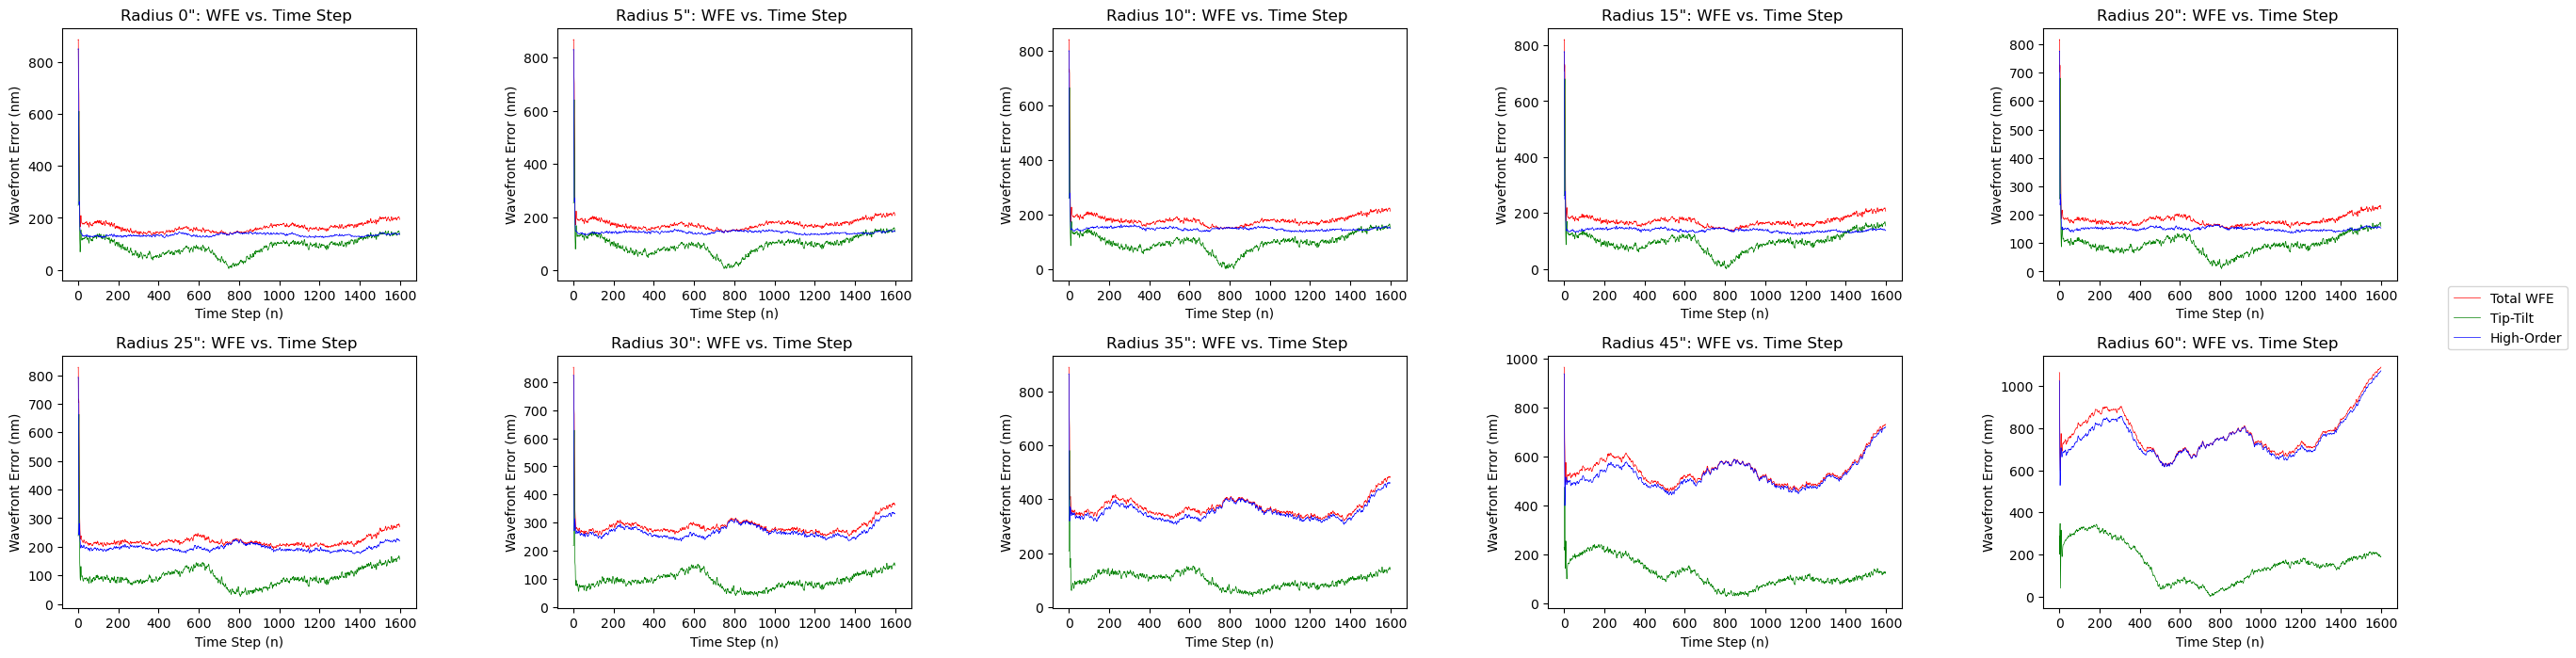

In [20]:
# Create subplots for all PSF locations
fig, ax = plt.subplots(2, n_psf // 2, figsize= (32,8), gridspec_kw={'hspace': 0.3, 'wspace': 0.4})

for i in range(n_psf):
    row_index = i // (n_psf // 2) # Creates two rows
    col_index = (i % (n_psf // 2)) # Creates five columns 
    clos_psf_results = results_xx[3][i]

    # Plot WFE vs. Time Step for each type of WFE (total, tip-tilt, high-order)
    for j in range(clos_psf_results.shape[1]):
        ax[row_index,col_index].plot(np.sqrt(clos_psf_results[:,j])*1.0e9, color=colors[j], label=wfe[j], linewidth=0.5)
        ax[row_index,col_index].set_xlabel('Time Step (n)')
        ax[row_index,col_index].set_ylabel('Wavefront Error (nm)')
        ax[row_index,col_index].set_title(f'Radius {psf_x[i]}": WFE vs. Time Step ')

# Add legend to only the last subplot
ax[-1,-1].legend(loc='upper right', bbox_to_anchor=(1.5, 1.3))

# Save the figure
#plt.savefig('../actuator_study_plots/actuator_4000_wfe_total.png', bbox_inches='tight', transparent=True)

In [21]:
#WFE
wfe_6 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_6, clos_mean_nm_6, open_xx_mean_nm_6, clos_xx_mean_nm_6 = wfe_6

In [22]:
os.chdir("..")

### 7 LGS

In [23]:
os.chdir("7lgs")

In [24]:
#PSF metrics
unsorted_mets_7 = maos_utils.get_psf_metrics_over_field(seed=seed)
unsorted_x_7, unsorted_y_7, unsorted_w_7, unsorted_strehl_7, unsorted_fwhm_g_7, unsorted_fwhm_e_7, unsorted_r_ee50_7, unsorted_r_ee80_7 = unsorted_mets_7

x_7 = np.concatenate((unsorted_x_7[:1], unsorted_x_7[8:9], unsorted_x_7[1:8], unsorted_x_7[9:]), axis=0)
w_7 = np.concatenate((unsorted_w_7[:1], unsorted_w_7[8:9], unsorted_w_7[1:8], unsorted_w_7[9:]), axis=0)
strehl_7 = np.concatenate((unsorted_strehl_7[:1], unsorted_strehl_7[8:9], unsorted_strehl_7[1:8], unsorted_strehl_7[9:]), axis=0)
fwhm_g_7 = np.concatenate((unsorted_fwhm_g_7[:1], unsorted_fwhm_g_7[8:9], unsorted_fwhm_g_7[1:8], unsorted_fwhm_g_7[9:]), axis=0)
fwhm_e_7 = np.concatenate((unsorted_fwhm_e_7[:1], unsorted_fwhm_e_7[8:9], unsorted_fwhm_e_7[1:8], unsorted_fwhm_e_7[9:]), axis=0)
r_ee50_7 = np.concatenate((unsorted_r_ee50_7[:1], unsorted_r_ee50_7[8:9], unsorted_r_ee50_7[1:8], unsorted_r_ee50_7[9:]), axis=0)
r_ee80_7 = np.concatenate((unsorted_r_ee80_7[:1], unsorted_r_ee80_7[8:9], unsorted_r_ee80_7[1:8], unsorted_r_ee80_7[9:]), axis=0)

In [25]:
#WFE
wfe_7 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_7, clos_mean_nm_7, open_xx_mean_nm_7, clos_xx_mean_nm_7 = wfe_7

In [26]:
os.chdir("..")

### 8 LGS

In [27]:
os.chdir("8lgs")

In [28]:
#PSF metrics
unsorted_mets_8 = maos_utils.get_psf_metrics_over_field(seed=seed)
unsorted_x_8, unsorted_y_8, unsorted_w_8, unsorted_strehl_8, unsorted_fwhm_g_8, unsorted_fwhm_e_8, unsorted_r_ee50_8, unsorted_r_ee80_8 = unsorted_mets_8

x_8 = np.concatenate((unsorted_x_8[:1], unsorted_x_8[8:9], unsorted_x_8[1:8], unsorted_x_8[9:]), axis=0)
w_8 = np.concatenate((unsorted_w_8[:1], unsorted_w_8[8:9], unsorted_w_8[1:8], unsorted_w_8[9:]), axis=0)
strehl_8 = np.concatenate((unsorted_strehl_8[:1], unsorted_strehl_8[8:9], unsorted_strehl_8[1:8], unsorted_strehl_8[9:]), axis=0)
fwhm_g_8 = np.concatenate((unsorted_fwhm_g_8[:1], unsorted_fwhm_g_8[8:9], unsorted_fwhm_g_8[1:8], unsorted_fwhm_g_8[9:]), axis=0)
fwhm_e_8 = np.concatenate((unsorted_fwhm_e_8[:1], unsorted_fwhm_e_8[8:9], unsorted_fwhm_e_8[1:8], unsorted_fwhm_e_8[9:]), axis=0)
r_ee50_8 = np.concatenate((unsorted_r_ee50_8[:1], unsorted_r_ee50_8[8:9], unsorted_r_ee50_8[1:8], unsorted_r_ee50_8[9:]), axis=0)
r_ee80_8 = np.concatenate((unsorted_r_ee80_8[:1], unsorted_r_ee80_8[8:9], unsorted_r_ee80_8[1:8], unsorted_r_ee80_8[9:]), axis=0)

In [29]:
#WFE
wfe_8 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_8, clos_mean_nm_8, open_xx_mean_nm_8, clos_xx_mean_nm_8 = wfe_8

In [30]:
os.chdir("..")

### 9 LGS

In [31]:
os.chdir("9lgs")

In [32]:
#PSF metrics
unsorted_mets_9 = maos_utils.get_psf_metrics_over_field(seed=seed)
unsorted_x_9, unsorted_y_9, unsorted_w_9, unsorted_strehl_9, unsorted_fwhm_g_9, unsorted_fwhm_e_9, unsorted_r_ee50_9, unsorted_r_ee80_9 = unsorted_mets_9

x_9 = np.concatenate((unsorted_x_9[:1], unsorted_x_9[8:9], unsorted_x_9[1:8], unsorted_x_9[9:]), axis=0)
w_9 = np.concatenate((unsorted_w_9[:1], unsorted_w_9[8:9], unsorted_w_9[1:8], unsorted_w_9[9:]), axis=0)
strehl_9 = np.concatenate((unsorted_strehl_9[:1], unsorted_strehl_9[8:9], unsorted_strehl_9[1:8], unsorted_strehl_9[9:]), axis=0)
fwhm_g_9 = np.concatenate((unsorted_fwhm_g_9[:1], unsorted_fwhm_g_9[8:9], unsorted_fwhm_g_9[1:8], unsorted_fwhm_g_9[9:]), axis=0)
fwhm_e_9 = np.concatenate((unsorted_fwhm_e_9[:1], unsorted_fwhm_e_9[8:9], unsorted_fwhm_e_9[1:8], unsorted_fwhm_e_9[9:]), axis=0)
r_ee50_9 = np.concatenate((unsorted_r_ee50_9[:1], unsorted_r_ee50_9[8:9], unsorted_r_ee50_9[1:8], unsorted_r_ee50_9[9:]), axis=0)
r_ee80_9 = np.concatenate((unsorted_r_ee80_9[:1], unsorted_r_ee80_9[8:9], unsorted_r_ee80_9[1:8], unsorted_r_ee80_9[9:]), axis=0)

In [33]:
#WFE
wfe_9 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_9, clos_mean_nm_9, open_xx_mean_nm_9, clos_xx_mean_nm_9 = wfe_9

In [34]:
os.chdir("..")

### 10 LGS

In [35]:
os.chdir("10lgs")

In [36]:
#PSF metrics
unsorted_mets_10 = maos_utils.get_psf_metrics_over_field(seed=seed)
unsorted_x_10, unsorted_y_10, unsorted_w_10, unsorted_strehl_10, unsorted_fwhm_g_10, unsorted_fwhm_e_10, unsorted_r_ee50_10, unsorted_r_ee80_10 = unsorted_mets_10

x_10 = np.concatenate((unsorted_x_10[:1], unsorted_x_10[8:9], unsorted_x_10[1:8], unsorted_x_10[9:]), axis=0)
w_10 = np.concatenate((unsorted_w_10[:1], unsorted_w_10[8:9], unsorted_w_10[1:8], unsorted_w_10[9:]), axis=0)
strehl_10 = np.concatenate((unsorted_strehl_10[:1], unsorted_strehl_10[8:9], unsorted_strehl_10[1:8], unsorted_strehl_10[9:]), axis=0)
fwhm_g_10 = np.concatenate((unsorted_fwhm_g_10[:1], unsorted_fwhm_g_10[8:9], unsorted_fwhm_g_10[1:8], unsorted_fwhm_g_10[9:]), axis=0)
fwhm_e_10 = np.concatenate((unsorted_fwhm_e_10[:1], unsorted_fwhm_e_10[8:9], unsorted_fwhm_e_10[1:8], unsorted_fwhm_e_10[9:]), axis=0)
r_ee50_10 = np.concatenate((unsorted_r_ee50_10[:1], unsorted_r_ee50_10[8:9], unsorted_r_ee50_10[1:8], unsorted_r_ee50_10[9:]), axis=0)
r_ee80_10 = np.concatenate((unsorted_r_ee80_10[:1], unsorted_r_ee80_10[8:9], unsorted_r_ee80_10[1:8], unsorted_r_ee80_10[9:]), axis=0)

In [37]:
#WFE
wfe_10 = act_study.get_wfe_metrics(seed=seed)
open_mean_nm_10, clos_mean_nm_10, open_xx_mean_nm_10, clos_xx_mean_nm_10 = wfe_10

In [38]:
os.chdir("..")

# Results

Adjusted specifically for tip-tilt guide star radius at 30" and laser guide star radius at 15".

In [39]:
# Retrive shape of data for each actuator count
n_wvl_3 = x_3.shape[1]
colors_3 = plt.cm.jet(np.linspace(0,1,n_wvl_3)) 

n_wvl_4 = x_4.shape[1]
colors_4 = plt.cm.jet(np.linspace(0,1,n_wvl_4))

n_wvl_5 = x_5.shape[1]
colors_5 = plt.cm.jet(np.linspace(0,1,n_wvl_5))

n_wvl_6 = x_6.shape[1]
colors_6 = plt.cm.jet(np.linspace(0,1,n_wvl_6))

n_wvl_7 = x_7.shape[1]
colors_7 = plt.cm.jet(np.linspace(0,1,n_wvl_7))

n_wvl_8 = x_8.shape[1]
colors_8 = plt.cm.jet(np.linspace(0,1,n_wvl_8))

n_wvl_9 = x_9.shape[1]
colors_9 = plt.cm.jet(np.linspace(0,1,n_wvl_9))

n_wvl_10 = x_10.shape[1]
colors_10 = plt.cm.jet(np.linspace(0,1,n_wvl_10)) 

### Radius vs. Strehl (Individual Plots)

In [40]:
#Create figure for actuator study
for i in lgs: 
    plt.figure(figsize=(4,4))

    # Iterate over each wavelength for the specific actuator count
    for ww in range(n_wvl_3):
        label = f'{w_3[0, ww]*1e3:3.0f} nm'
        x_data = locals()[f'x_{i}'][:, ww] # Science Target Radius
        strehl_data = locals()[f'strehl_{i}'][:, ww]
        color_data = locals()[f'colors_{i}'][ww] # Color for each wavelength
        plt.plot(x_data, strehl_data, color=color_data, label=label)
        
    plt.title(f'{i} LGS 7mag: Science Target Radius (") vs. Strehl')
    plt.xlabel('Science Target Raidus (")')
    plt.ylabel('Strehl Values')
    plt.axvline(30, linestyle='--', color='grey') # Vertical line for Tip-Tilt (TT) and LGS radius
    plt.text(31, 0.82, 'LGS radius', color='grey', ha='left')
    plt.text(31, 0.97, 'TT radius', color='grey', ha='left')

    #plt.savefig(f'actuator_study_plots/actuator_strehl_subplot_{i}.png', bbox_inches='tight', transparent=True)
    plt.close()    

### Radius vs. Strehl (1 Subplot)

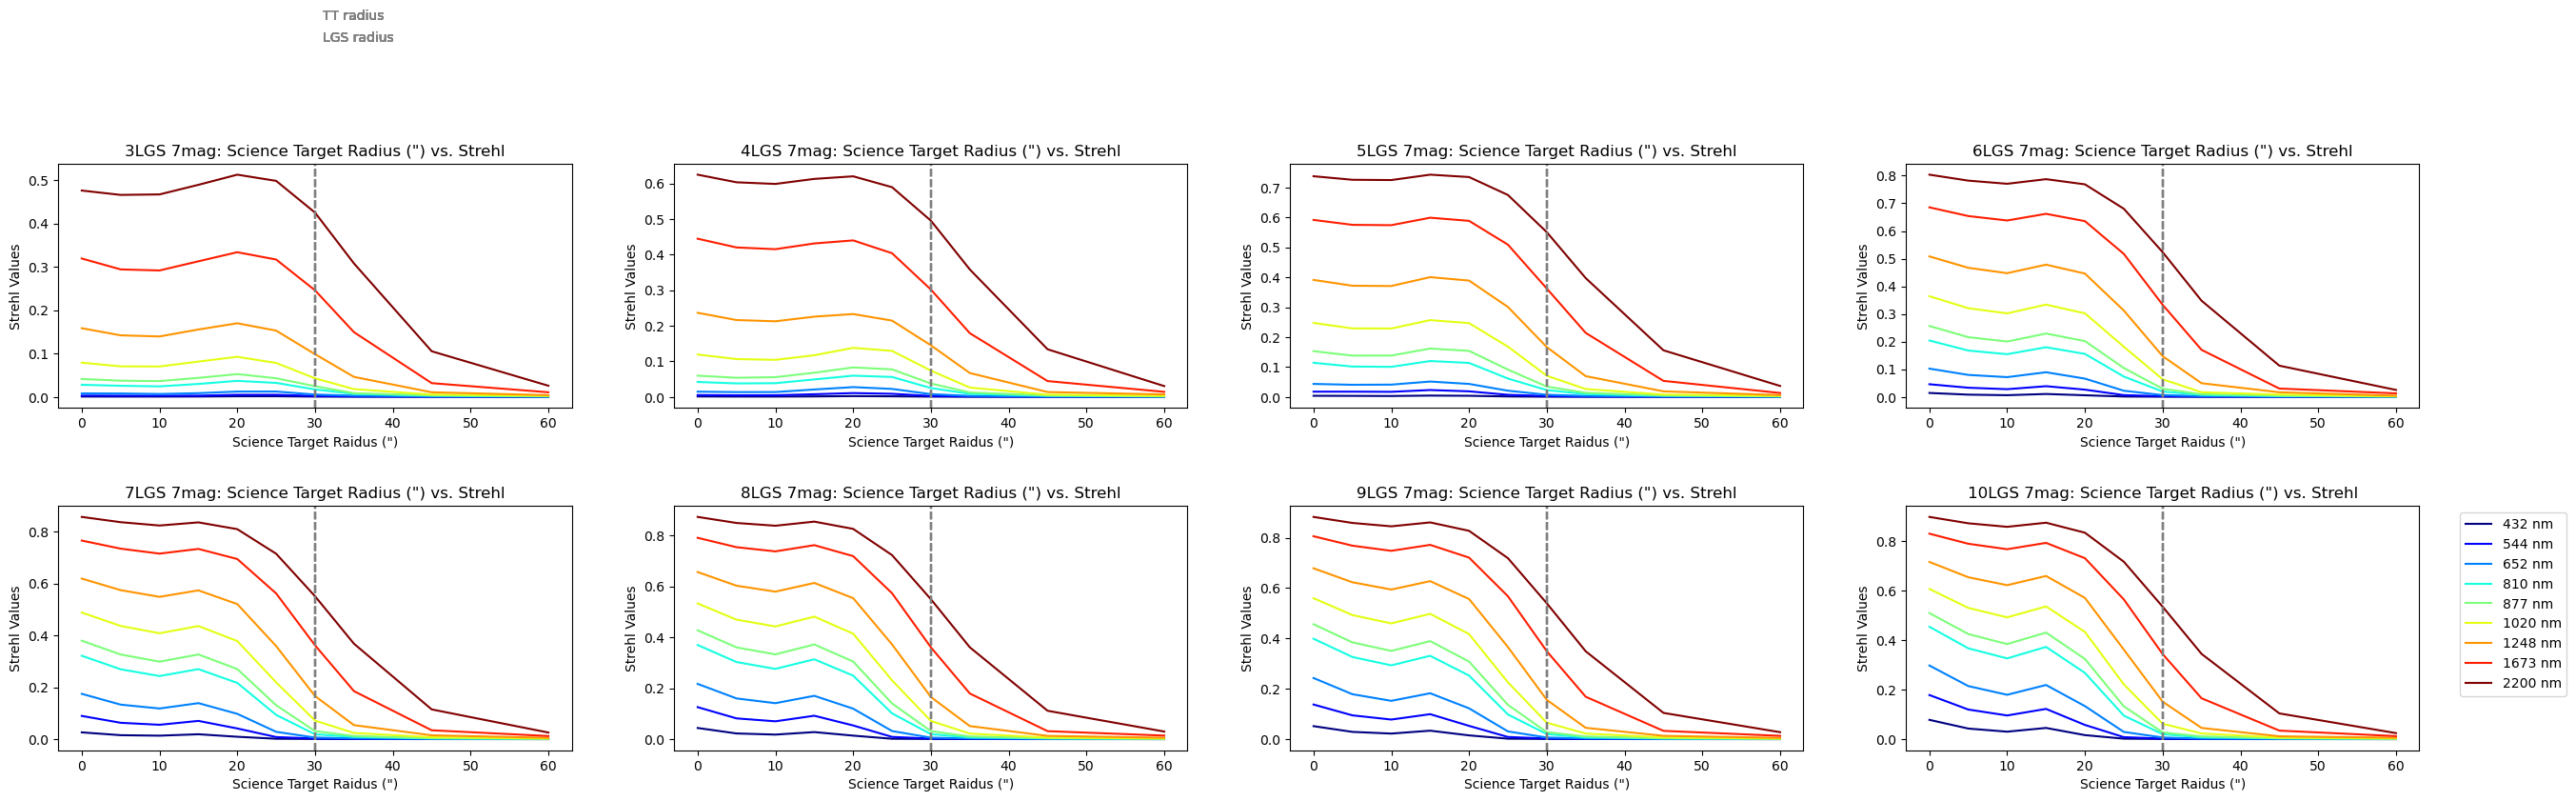

In [41]:
fig, ax = plt.subplots(2, 4, figsize=(32, 8))

# Iterate over each wavelength
for ww in range(n_wvl_3):
    
    # Define label for the current wavelength
    label = f'{w_3[0, ww]*1e3:3.0f} nm'

    #3 LGS
    ax[0,0].plot(x_3[:, ww], strehl_3[:, ww], color=colors_3[ww])
    ax[0,0].set_title('3LGS 7mag: Science Target Radius (") vs. Strehl')
    ax[0,0].set_xlabel('Science Target Raidus (")')
    ax[0,0].set_ylabel('Strehl Values')
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].text(31, 0.82, 'LGS radius', color='grey', ha='left')
    ax[0,0].text(31, 0.87, 'TT radius', color='grey', ha='left')

    #4 LGS
    ax[0,1].plot(x_4[:, ww], strehl_4[:, ww], color=colors_4[ww], label=label)
    ax[0,1].set_xlabel('Science Target Raidus (")')
    ax[0,1].set_ylabel('Strehl Values')
    ax[0,1].axvline(30, linestyle='--', color='grey')
    ax[0,1].set_title('4LGS 7mag: Science Target Radius (") vs. Strehl')

    #5 LGS
    ax[0,2].plot(x_5[:, ww], strehl_5[:, ww], color=colors_5[ww], label=label)
    ax[0,2].set_xlabel('Science Target Raidus (")')
    ax[0,2].set_ylabel('Strehl Values')
    ax[0,2].axvline(30, linestyle='--', color='grey')
    ax[0,2].set_title('5LGS 7mag: Science Target Radius (") vs. Strehl')

    #6 LGS
    ax[0,3].plot(x_6[:, ww], strehl_6[:, ww], color=colors_6[ww], label=label)
    ax[0,3].set_xlabel('Science Target Raidus (")')
    ax[0,3].set_ylabel('Strehl Values')
    ax[0,3].axvline(30, linestyle='--', color='grey')
    ax[0,3].set_title('6LGS 7mag: Science Target Radius (") vs. Strehl')

    #7 LGS
    ax[1,0].plot(x_7[:, ww], strehl_7[:, ww], color=colors_7[ww], label=label)
    ax[1,0].set_xlabel('Science Target Raidus (")')
    ax[1,0].set_ylabel('Strehl Values')
    ax[1,0].axvline(30, linestyle='--', color='grey')
    ax[1,0].set_title('7LGS 7mag: Science Target Radius (") vs. Strehl')

    #8 LGS
    ax[1,1].plot(x_8[:, ww], strehl_8[:, ww], color=colors_8[ww], label=label)
    ax[1,1].set_xlabel('Science Target Raidus (")')
    ax[1,1].set_ylabel('Strehl Values')
    ax[1,1].axvline(30, linestyle='--', color='grey')
    ax[1,1].set_title('8LGS 7mag: Science Target Radius (") vs. Strehl')

    #9 LGS
    ax[1,2].plot(x_9[:, ww], strehl_9[:, ww], color=colors_9[ww], label=label)
    ax[1,2].set_xlabel('Science Target Raidus (")')
    ax[1,2].set_ylabel('Strehl Values')
    ax[1,2].axvline(30, linestyle='--', color='grey')
    ax[1,2].set_title('9LGS 7mag: Science Target Radius (") vs. Strehl')

    #10 LGS
    ax[1,3].plot(x_10[:, ww], strehl_10[:, ww], color=colors_10[ww], label=label)
    ax[1,3].set_xlabel('Science Target Raidus (")')
    ax[1,3].set_ylabel('Strehl Values')
    ax[1,3].axvline(30, linestyle='--', color='grey')
    ax[1,3].set_title('10LGS 7mag: Science Target Radius (") vs. Strehl')
    ax[1,3].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.subplots_adjust(hspace=0.4) 

# Save the figure
#plt.savefig('actuator_study_plots/actuator_strehl_total.png', bbox_inches='tight', transparent=True)

### Radius vs. FWHM (Individual plots)

In [42]:
# Plotting Radius vs. FWHM for each dm height count
for i in lgs: 
    plt.figure(figsize=(4,4))
    
    for ww in range(n_wvl_3):
        label = f'{w_3[0, ww]*1e3:3.0f} nm'
        x_data = locals()[f'x_{i}'][:, ww]
        fwhm_data = locals()[f'fwhm_g_{i}'][:, ww]
        color_data = locals()[f'colors_{i}'][ww]
        plt.plot(x_data, fwhm_data, color=color_data, label=label)
        
    plt.title(f'{i} LGS 7mag: Science Target Radius (") vs. FWHM')
    plt.xlabel('Science Target Raidus (")')
    plt.ylabel('Gaussian Full-Width Half Max')
    plt.axvline(30, linestyle='--', color='grey')
    plt.text(29, 240, 'LGS radius', color='grey', ha='right')
    plt.text(29, 260, 'TT radius', color='grey', ha='right')

    #plt.savefig(f'actuator_study_plots/actuator_fwhm_subplot_{i}.png', bbox_inches='tight', transparent=True)
    plt.close()  

### Radius vs. FWHM (1 Subplot)

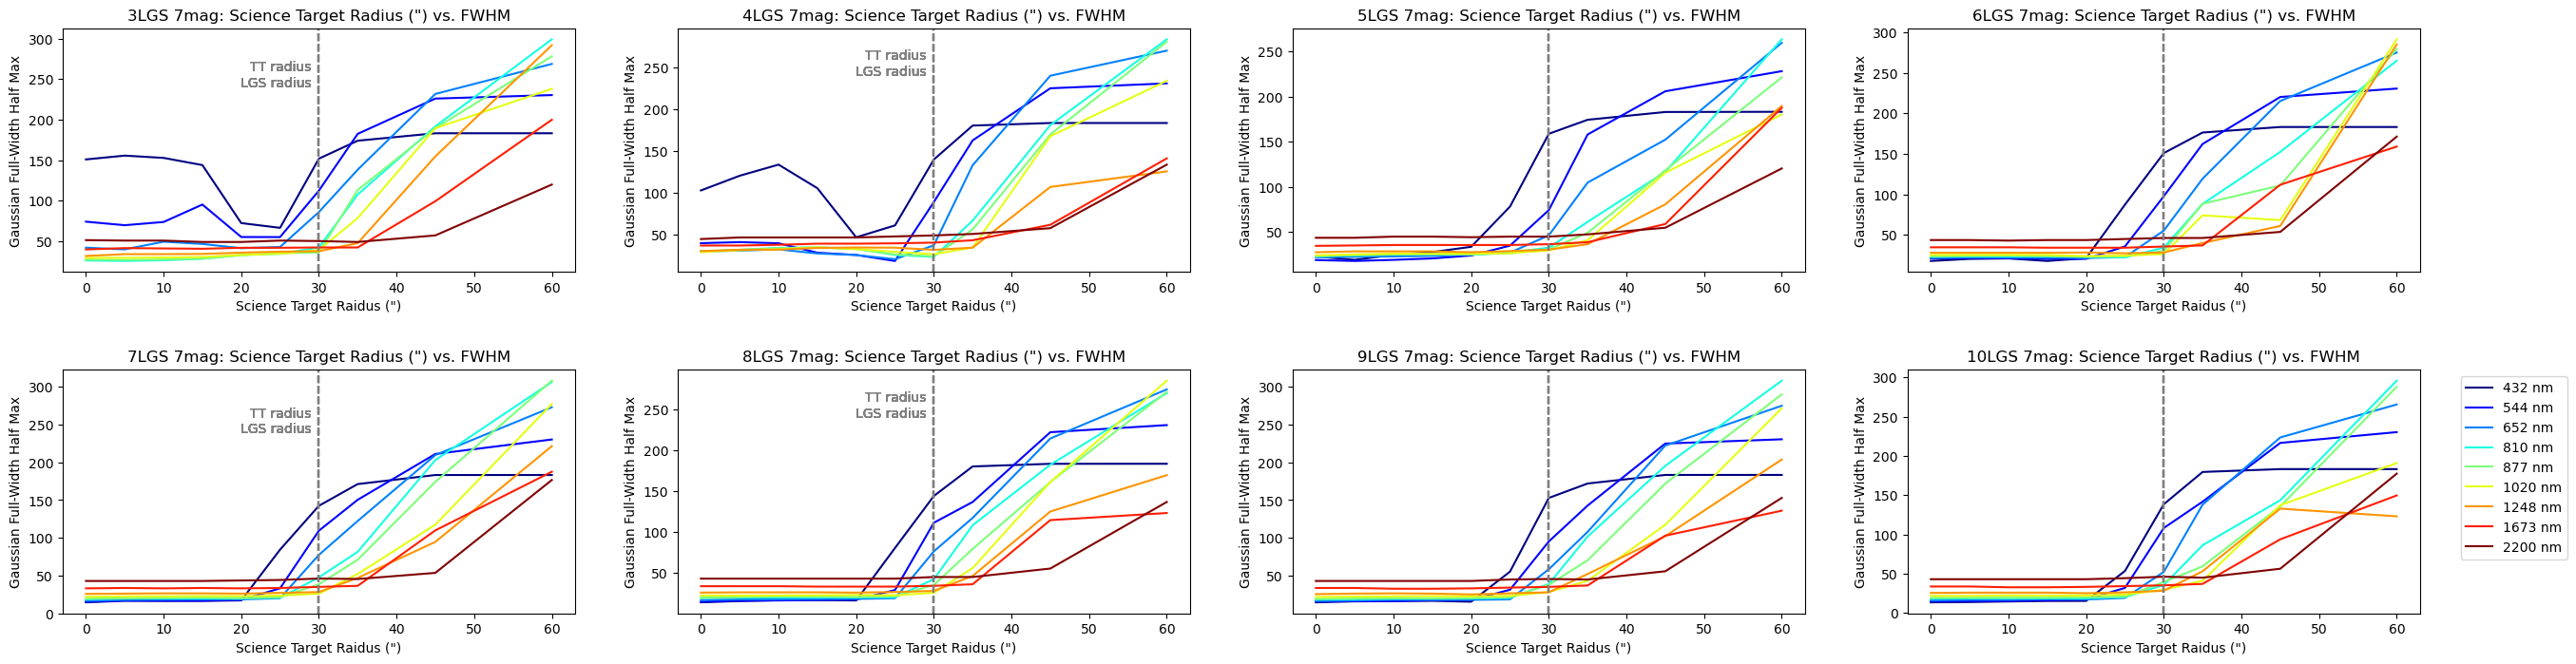

In [43]:
#Create figure for actuator study
fig, ax = plt.subplots(2, 4, figsize=(32, 8))

for ww in range(n_wvl_3):
    #Define wavelengths 
    label = f'{w_3[0, ww]*1e3:3.0f} nm'

    #3 LGS
    ax[0,0].plot(x_3[:, ww], fwhm_g_3[:, ww], color=colors_3[ww])
    ax[0,0].set_title('3LGS 7mag: Science Target Radius (") vs. FWHM')
    ax[0,0].set_xlabel('Science Target Raidus (")')
    ax[0,0].set_ylabel('Gaussian Full-Width Half Max')
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].text(29, 240, 'LGS radius', color='grey', ha='right')
    ax[0,0].text(29, 260, 'TT radius', color='grey', ha='right')

    #4 LGS
    ax[0,1].plot(x_4[:, ww], fwhm_g_4[:, ww], color=colors_4[ww])
    ax[0,1].set_title('4LGS 7mag: Science Target Radius (") vs. FWHM')
    ax[0,1].set_xlabel('Science Target Raidus (")')
    ax[0,1].set_ylabel('Gaussian Full-Width Half Max')
    ax[0,1].axvline(30, linestyle='--', color='grey')
    ax[0,1].text(29, 240, 'LGS radius', color='grey', ha='right')
    ax[0,1].text(29, 260, 'TT radius', color='grey', ha='right')

    #5 LGS
    ax[0,2].plot(x_5[:, ww], fwhm_g_5[:, ww], color=colors_5[ww], label=label)
    ax[0,2].set_ylabel('Gaussian Full-Width Half Max')
    ax[0,2].set_xlabel('Science Target Raidus (")')
    ax[0,2].axvline(30, linestyle='--', color='grey')
    ax[0,2].set_title('5LGS 7mag: Science Target Radius (") vs. FWHM')

    #6 LGS
    ax[0,3].plot(x_6[:, ww], fwhm_g_6[:, ww], color=colors_6[ww], label=label)
    ax[0,3].set_ylabel('Gaussian Full-Width Half Max')
    ax[0,3].set_xlabel('Science Target Raidus (")')
    ax[0,3].axvline(30, linestyle='--', color='grey')
    ax[0,3].set_title('6LGS 7mag: Science Target Radius (") vs. FWHM')

    #7 LGS
    ax[1,0].plot(x_7[:, ww], fwhm_g_7[:, ww], color=colors_7[ww])
    ax[1,0].set_title('7LGS 7mag: Science Target Radius (") vs. FWHM')
    ax[1,0].set_xlabel('Science Target Raidus (")')
    ax[1,0].set_ylabel('Gaussian Full-Width Half Max')
    ax[1,0].axvline(30, linestyle='--', color='grey')
    ax[1,0].text(29, 240, 'LGS radius', color='grey', ha='right')
    ax[1,0].text(29, 260, 'TT radius', color='grey', ha='right')

    #8 LGS
    ax[1,1].plot(x_8[:, ww], fwhm_g_8[:, ww], color=colors_8[ww])
    ax[1,1].set_title('8LGS 7mag: Science Target Radius (") vs. FWHM')
    ax[1,1].set_xlabel('Science Target Raidus (")')
    ax[1,1].set_ylabel('Gaussian Full-Width Half Max')
    ax[1,1].axvline(30, linestyle='--', color='grey')
    ax[1,1].text(29, 240, 'LGS radius', color='grey', ha='right')
    ax[1,1].text(29, 260, 'TT radius', color='grey', ha='right')

    #9 LGS
    ax[1,2].plot(x_9[:, ww], fwhm_g_9[:, ww], color=colors_9[ww], label=label)
    ax[1,2].set_ylabel('Gaussian Full-Width Half Max')
    ax[1,2].set_xlabel('Science Target Raidus (")')
    ax[1,2].axvline(30, linestyle='--', color='grey')
    ax[1,2].set_title('9LGS 7mag: Science Target Radius (") vs. FWHM')

    #10 LGS
    ax[1,3].plot(x_10[:, ww], fwhm_g_10[:, ww], color=colors_10[ww], label=label)
    ax[1,3].set_ylabel('Gaussian Full-Width Half Max')
    ax[1,3].set_xlabel('Science Target Raidus (")')
    ax[1,3].axvline(30, linestyle='--', color='grey')
    ax[1,3].set_title('10LGS 7mag: Science Target Radius (") vs. FWHM')
    ax[1,3].legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    
plt.subplots_adjust(hspace=0.4) 
    
#plt.savefig('actuator_study_plots/actuator_fwhm_total.png', bbox_inches='tight', transparent=True)

### Radius vs. EE50 (Individual plots)

In [44]:
for i in lgs: 
    plt.figure(figsize=(8,8))
    
    for ww in range(n_wvl_3):
        label = f'{w_3[0, ww]*1e3:3.0f} nm'
        x_data = locals()[f'x_{i}'][:, ww]
        r_ee50_data = locals()[f'r_ee50_{i}'][:, ww]
        color_data = locals()[f'colors_{i}'][ww]
        plt.plot(x_data, r_ee50_data, color=color_data, label=label)
        
    plt.title(f'{i} LGS 7mag: Science Target Radius (") vs. EE50')
    plt.xlabel('Science Target Raidus (")')
    plt.ylabel('50% Encircled Energy')
    plt.axvline(30, linestyle='--', color='grey')
    plt.text(29, 175, 'LGS radius', color='grey', ha='right')
    plt.text(29, 195, 'TT radius', color='grey', ha='right')

    #plt.savefig(f'actuator_study_plots/actuator_ee50_subplot_{i}.png', bbox_inches='tight', transparent=True)
    plt.close()

### Radius vs. EE50 (1 Subplot)

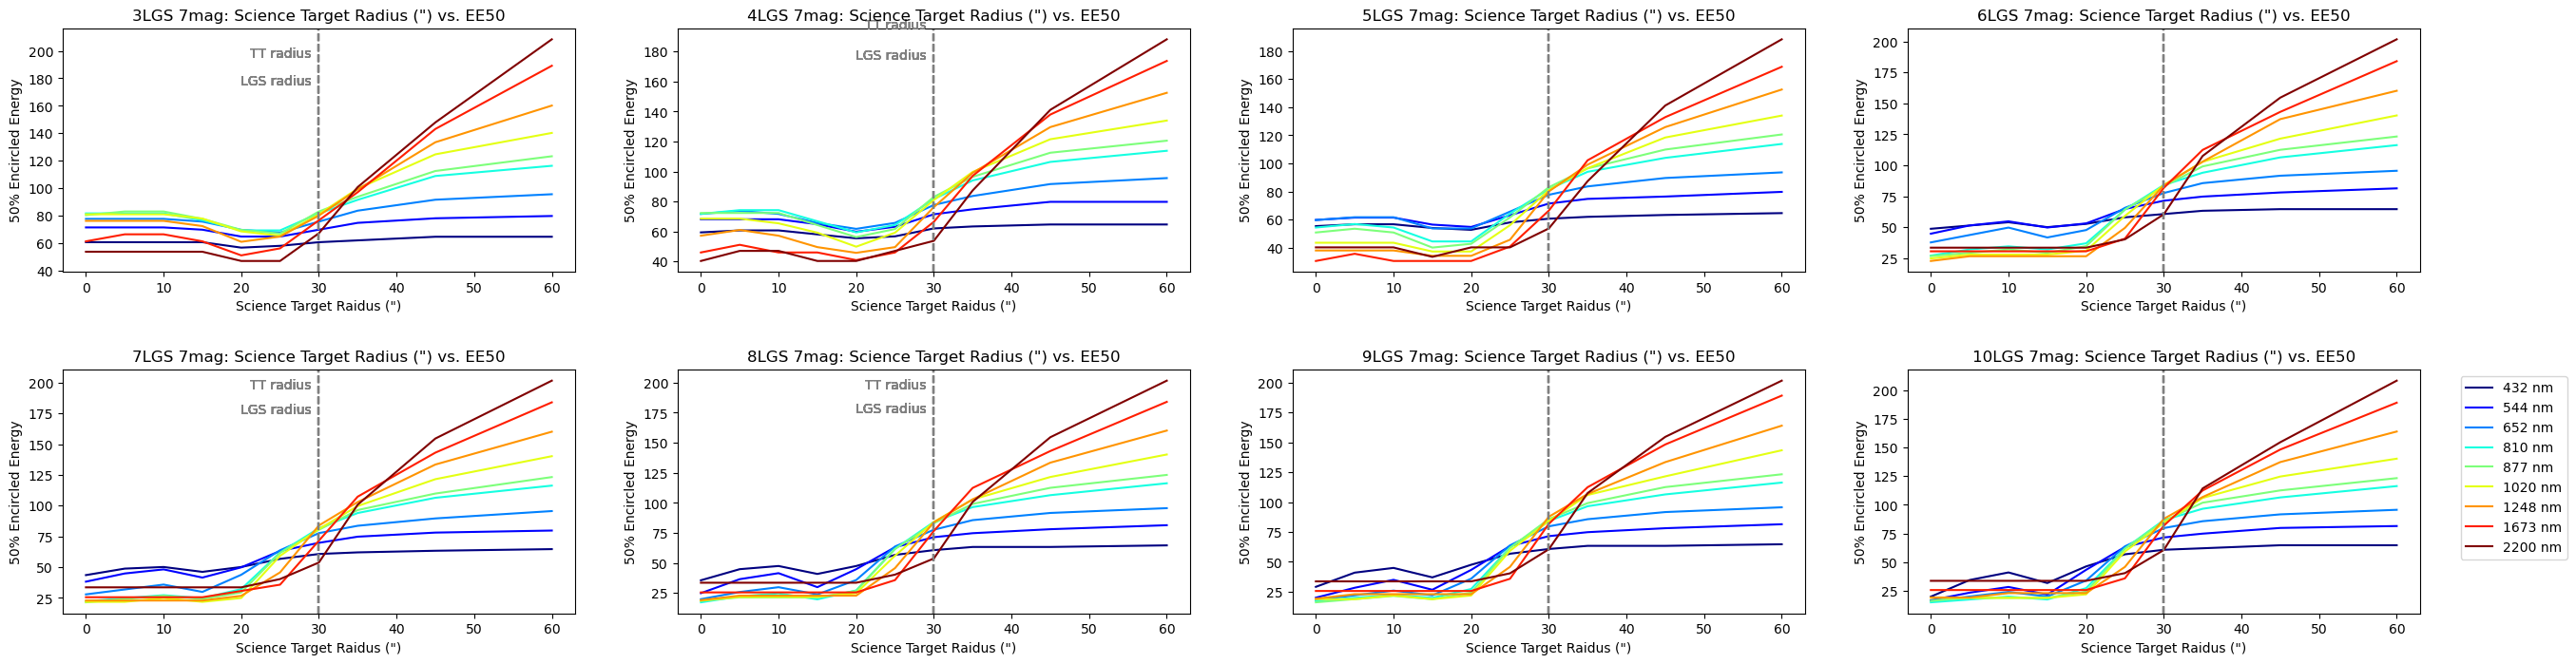

In [45]:
#Create figure for actuator study
fig, ax = plt.subplots(2, 4, figsize=(32, 8))

for ww in range(n_wvl_3):
    #Define wavelengths 
    label = f'{w_3[0, ww]*1e3:3.0f} nm'

    #3 LGS
    ax[0,0].plot(x_3[:, ww], r_ee50_3[:, ww], color=colors_3[ww])
    ax[0,0].set_title('3LGS 7mag: Science Target Radius (") vs. EE50')
    ax[0,0].set_ylabel('50% Encircled Energy')
    ax[0,0].set_xlabel('Science Target Raidus (")')
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].text(29, 175, 'LGS radius', color='grey', ha='right')
    ax[0,0].text(29, 195, 'TT radius', color='grey', ha='right')

    #4 LGS
    ax[0,1].plot(x_4[:, ww], r_ee50_4[:, ww], color=colors_4[ww])
    ax[0,1].set_title('4LGS 7mag: Science Target Radius (") vs. EE50')
    ax[0,1].set_ylabel('50% Encircled Energy')
    ax[0,1].set_xlabel('Science Target Raidus (")')
    ax[0,1].axvline(30, linestyle='--', color='grey')
    ax[0,1].text(29, 175, 'LGS radius', color='grey', ha='right')
    ax[0,1].text(29, 195, 'TT radius', color='grey', ha='right')

    #5 LGS
    ax[0,2].plot(x_5[:, ww], r_ee50_5[:, ww], color=colors_5[ww], label=label)
    ax[0,2].set_ylabel('50% Encircled Energy')
    ax[0,2].set_xlabel('Science Target Raidus (")')
    ax[0,2].axvline(30, linestyle='--', color='grey')
    ax[0,2].set_title('5LGS 7mag: Science Target Radius (") vs. EE50')

    #6 LGS
    ax[0,3].plot(x_6[:, ww], r_ee50_6[:, ww], color=colors_6[ww], label=label)
    ax[0,3].set_ylabel('50% Encircled Energy')
    ax[0,3].set_xlabel('Science Target Raidus (")')
    ax[0,3].axvline(30, linestyle='--', color='grey')
    ax[0,3].set_title('6LGS 7mag: Science Target Radius (") vs. EE50')

    #7 LGS
    ax[1,0].plot(x_7[:, ww], r_ee50_7[:, ww], color=colors_7[ww])
    ax[1,0].set_title('7LGS 7mag: Science Target Radius (") vs. EE50')
    ax[1,0].set_ylabel('50% Encircled Energy')
    ax[1,0].set_xlabel('Science Target Raidus (")')
    ax[1,0].axvline(30, linestyle='--', color='grey')
    ax[1,0].text(29, 175, 'LGS radius', color='grey', ha='right')
    ax[1,0].text(29, 195, 'TT radius', color='grey', ha='right')

    #8 LGS
    ax[1,1].plot(x_8[:, ww], r_ee50_8[:, ww], color=colors_8[ww])
    ax[1,1].set_title('8LGS 7mag: Science Target Radius (") vs. EE50')
    ax[1,1].set_ylabel('50% Encircled Energy')
    ax[1,1].set_xlabel('Science Target Raidus (")')
    ax[1,1].axvline(30, linestyle='--', color='grey')
    ax[1,1].text(29, 175, 'LGS radius', color='grey', ha='right')
    ax[1,1].text(29, 195, 'TT radius', color='grey', ha='right')

    #9 LGS
    ax[1,2].plot(x_9[:, ww], r_ee50_9[:, ww], color=colors_9[ww], label=label)
    ax[1,2].set_ylabel('50% Encircled Energy')
    ax[1,2].set_xlabel('Science Target Raidus (")')
    ax[1,2].axvline(30, linestyle='--', color='grey')
    ax[1,2].set_title('9LGS 7mag: Science Target Radius (") vs. EE50')

    #10 LGS
    ax[1,3].plot(x_10[:, ww], r_ee50_10[:, ww], color=colors_10[ww], label=label)
    ax[1,3].set_ylabel('50% Encircled Energy')
    ax[1,3].set_xlabel('Science Target Raidus (")')
    ax[1,3].axvline(30, linestyle='--', color='grey')
    ax[1,3].set_title('10LGS 7mag: Science Target Radius (") vs. EE50')
    ax[1,3].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.subplots_adjust(hspace=0.4) 

#plt.savefig('actuator_study_plots/actuator_ee50_total.png', bbox_inches='tight', transparent=True)

### Radius vs. EE80 (Individual plots)

In [46]:
for i in lgs: 
    plt.figure(figsize=(8,8))
    
    for ww in range(n_wvl_3):
        label = f'{w_3[0, ww]*1e3:3.0f} nm'
        x_data = locals()[f'x_{i}'][:, ww]
        r_ee80_data = locals()[f'r_ee80_{i}'][:, ww]
        color_data = locals()[f'colors_{i}'][ww]
        plt.plot(x_data, r_ee80_data, color=color_data, label=label)
        
    plt.title(f'{i} Actuators: Science Target Radius (") vs. EE80')
    plt.xlabel('Science Target Raidus (")')
    plt.ylabel('80% Encircled Energy')
    plt.axvline(30, linestyle='--', color='grey')
    plt.text(29, 290, 'LGS radius', color='grey', ha='right')
    plt.text(29, 310, 'TT radius', color='grey', ha='right')

    #plt.savefig(f'actuator_study_plots/actuator_ee80_subplot_{i}.png', bbox_inches='tight', transparent=True)
    plt.close()

### Radius vs. EE80 (1 Subplot)

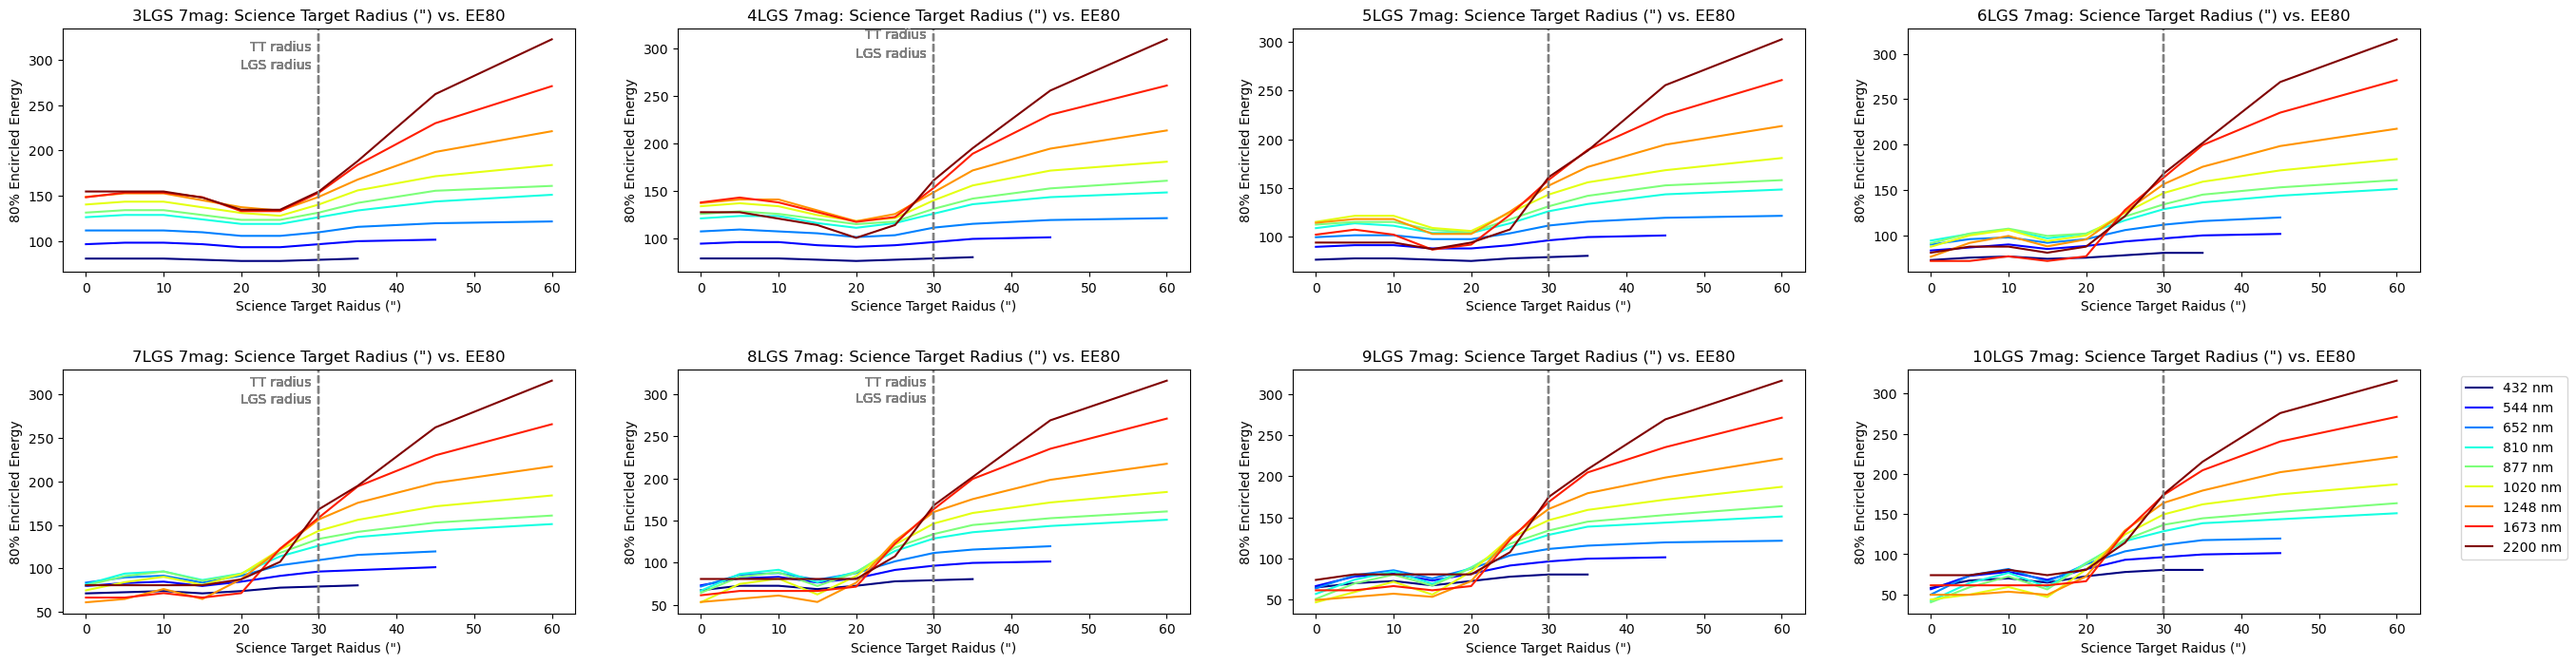

In [47]:
#Create figure for actuator study
fig, ax = plt.subplots(2, 4, figsize=(32, 8))

for ww in range(n_wvl_3):
    #Define wavelengths 
    label = f'{w_3[0, ww]*1e3:3.0f} nm'

    #3 LGS
    ax[0,0].plot(x_3[:, ww], r_ee80_3[:, ww], color=colors_3[ww])
    ax[0,0].set_title('3LGS 7mag: Science Target Radius (") vs. EE80')
    ax[0,0].set_ylabel('80% Encircled Energy')
    ax[0,0].set_xlabel('Science Target Raidus (")')
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].text(29, 290, 'LGS radius', color='grey', ha='right')
    ax[0,0].text(29, 310, 'TT radius', color='grey', ha='right')

    #4 LGS
    ax[0,1].plot(x_4[:, ww], r_ee80_4[:, ww], color=colors_4[ww])
    ax[0,1].set_title('4LGS 7mag: Science Target Radius (") vs. EE80')
    ax[0,1].set_ylabel('80% Encircled Energy')
    ax[0,1].set_xlabel('Science Target Raidus (")')
    ax[0,1].axvline(30, linestyle='--', color='grey')
    ax[0,1].text(29, 290, 'LGS radius', color='grey', ha='right')
    ax[0,1].text(29, 310, 'TT radius', color='grey', ha='right')

    #5 LGS
    ax[0,2].plot(x_5[:, ww], r_ee80_5[:, ww], color=colors_5[ww], label=label)
    ax[0,2].set_ylabel('80% Encircled Energy')
    ax[0,2].set_xlabel('Science Target Raidus (")')
    ax[0,2].axvline(30, linestyle='--', color='grey')
    ax[0,2].set_title('5LGS 7mag: Science Target Radius (") vs. EE80')

    #6 LGS
    ax[0,3].plot(x_6[:, ww], r_ee80_6[:, ww], color=colors_6[ww], label=label)
    ax[0,3].set_ylabel('80% Encircled Energy')
    ax[0,3].set_xlabel('Science Target Raidus (")')
    ax[0,3].axvline(30, linestyle='--', color='grey')
    ax[0,3].set_title('6LGS 7mag: Science Target Radius (") vs. EE80')
    
    #7 lGS
    ax[1,0].plot(x_7[:, ww], r_ee80_7[:, ww], color=colors_7[ww])
    ax[1,0].set_title('7LGS 7mag: Science Target Radius (") vs. EE80')
    ax[1,0].set_ylabel('80% Encircled Energy')
    ax[1,0].set_xlabel('Science Target Raidus (")')
    ax[1,0].axvline(30, linestyle='--', color='grey')
    ax[1,0].text(29, 290, 'LGS radius', color='grey', ha='right')
    ax[1,0].text(29, 310, 'TT radius', color='grey', ha='right')

    #8 LGS
    ax[1,1].plot(x_8[:, ww], r_ee80_8[:, ww], color=colors_8[ww])
    ax[1,1].set_title('8LGS 7mag: Science Target Radius (") vs. EE80')
    ax[1,1].set_ylabel('80% Encircled Energy')
    ax[1,1].set_xlabel('Science Target Raidus (")')
    ax[1,1].axvline(30, linestyle='--', color='grey')
    ax[1,1].text(29, 290, 'LGS radius', color='grey', ha='right')
    ax[1,1].text(29, 310, 'TT radius', color='grey', ha='right')

    #9 LGS
    ax[1,2].plot(x_9[:, ww], r_ee80_9[:, ww], color=colors_9[ww], label=label)
    ax[1,2].set_ylabel('80% Encircled Energy')
    ax[1,2].set_xlabel('Science Target Raidus (")')
    ax[1,2].axvline(30, linestyle='--', color='grey')
    ax[1,2].set_title('9LGS 7mag: Science Target Radius (") vs. EE80')

    #10 LGS
    ax[1,3].plot(x_10[:, ww], r_ee80_10[:, ww], color=colors_10[ww], label=label)
    ax[1,3].set_ylabel('80% Encircled Energy')
    ax[1,3].set_xlabel('Science Target Raidus (")')
    ax[1,3].axvline(30, linestyle='--', color='grey')
    ax[1,3].set_title('10LGS 7mag: Science Target Radius (") vs. EE80')
    ax[1,3].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.subplots_adjust(hspace=0.4) 

#plt.savefig('actuator_study_plots/actuator_ee80_total.png', bbox_inches='tight', transparent=True)

### Radius vs. WFE (Individual plots)

In [48]:
# Define colors for wavefront error 
wfe = ["Total WFE", "Tip-Tilt", "High-Order"]
colors_wfe = ["r", "g", "b"]

for i in lgs: 
    plt.figure(figsize=(8,8))
    
    for j, color in enumerate(colors_wfe):
        clos_data = locals()[f'clos_xx_mean_nm_{i}'][:, j]
        plt.plot(x_data, clos_data, color=colors_wfe[j], label=wfe[j])
        
    plt.title(f'{i} LGS 7mag: Science Target Radius (") vs. EE80')
    plt.xlabel('Science Target Raidus (")')
    plt.ylabel('Wave-front Error (nm)')
    plt.axvline(30, linestyle='--', color='grey')
    plt.text(29, 750, 'LGS radius', color='grey', ha='right')
    plt.text(29, 800, 'TT radius', color='grey', ha='right')

    #plt.savefig(f'actuator_study_plots/actuator_wfe_subplot_{i}.png', bbox_inches='tight', transparent=True)
    plt.close()

### Radius vs. WFE (1 Subplot)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


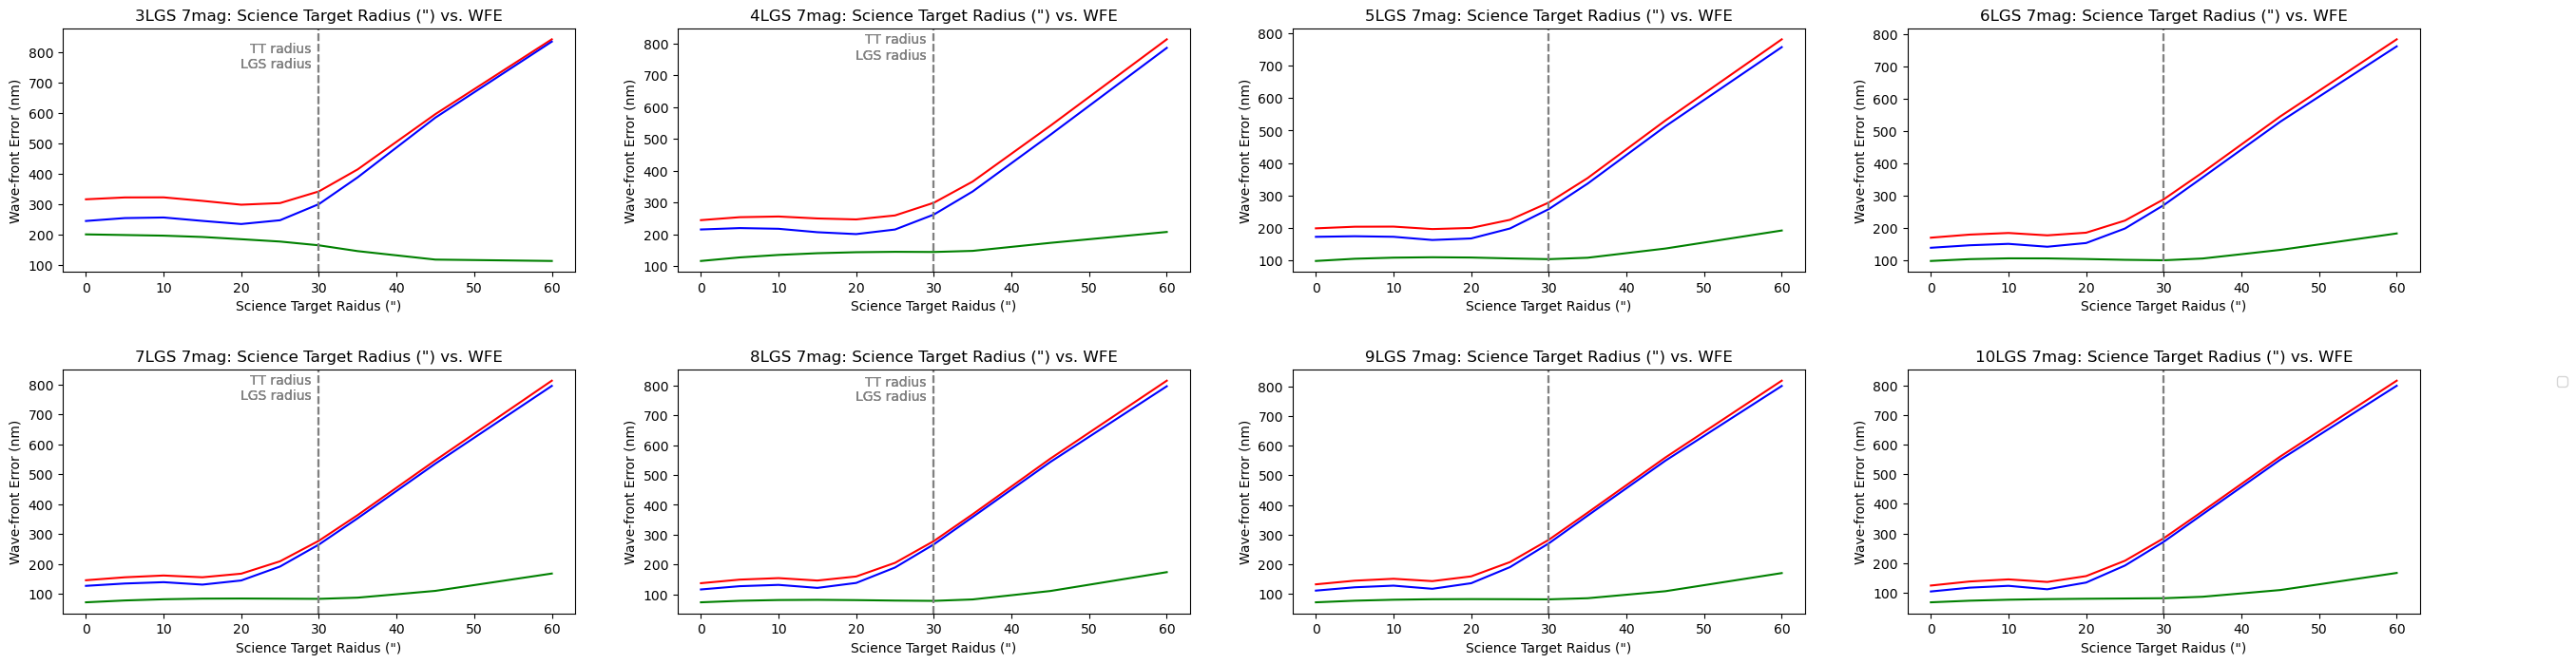

In [49]:
#Create figure for actuator study
fig, ax = plt.subplots(2, 4, figsize=(32, 8))

for i,c in enumerate(colors_wfe):

    #3 lGS
    ax[0,0].plot(psf_x, clos_xx_mean_nm_3[:,i], color=colors_wfe[i])
    ax[0,0].set_title('3LGS 7mag: Science Target Radius (") vs. WFE')
    ax[0,0].set_ylabel('Wave-front Error (nm)')
    ax[0,0].set_xlabel('Science Target Raidus (")')
    ax[0,0].axvline(30, linestyle='--', color='grey')
    ax[0,0].text(29, 750, 'LGS radius', color='grey', ha='right')
    ax[0,0].text(29, 800, 'TT radius', color='grey', ha='right')
    
    #4 LGS
    ax[0,1].plot(psf_x, clos_xx_mean_nm_4[:,i], color=colors_wfe[i])
    ax[0,1].set_title('4LGS 7mag: Science Target Radius (") vs. WFE')
    ax[0,1].set_ylabel('Wave-front Error (nm)')
    ax[0,1].set_xlabel('Science Target Raidus (")')
    ax[0,1].axvline(30, linestyle='--', color='grey')
    ax[0,1].text(29, 750, 'LGS radius', color='grey', ha='right')
    ax[0,1].text(29, 800, 'TT radius', color='grey', ha='right')

    #5 LGS
    ax[0,2].plot(psf_x, clos_xx_mean_nm_5[:,i], color=colors_wfe[i])
    ax[0,2].set_title('5LGS 7mag: Science Target Radius (") vs. WFE')
    ax[0,2].set_ylabel('Wave-front Error (nm)')
    ax[0,2].set_xlabel('Science Target Raidus (")')
    ax[0,2].axvline(30, linestyle='--', color='grey')

    #6 LGS
    ax[0,3].plot(psf_x, clos_xx_mean_nm_6[:,i], color=colors_wfe[i])
    ax[0,3].set_title('6LGS 7mag: Science Target Radius (") vs. WFE')
    ax[0,3].set_ylabel('Wave-front Error (nm)')
    ax[0,3].set_xlabel('Science Target Raidus (")')
    ax[0,3].axvline(30, linestyle='--', color='grey')
    
    #7 LGS
    ax[1,0].plot(psf_x, clos_xx_mean_nm_7[:,i], color=colors_wfe[i])
    ax[1,0].set_title('7LGS 7mag: Science Target Radius (") vs. WFE')
    ax[1,0].set_ylabel('Wave-front Error (nm)')
    ax[1,0].set_xlabel('Science Target Raidus (")')
    ax[1,0].axvline(30, linestyle='--', color='grey')
    ax[1,0].text(29, 750, 'LGS radius', color='grey', ha='right')
    ax[1,0].text(29, 800, 'TT radius', color='grey', ha='right')

    #8 LGS
    ax[1,1].plot(psf_x, clos_xx_mean_nm_8[:,i], color=colors_wfe[i])
    ax[1,1].set_title('8LGS 7mag: Science Target Radius (") vs. WFE')
    ax[1,1].set_ylabel('Wave-front Error (nm)')
    ax[1,1].set_xlabel('Science Target Raidus (")')
    ax[1,1].axvline(30, linestyle='--', color='grey')
    ax[1,1].text(29, 750, 'LGS radius', color='grey', ha='right')
    ax[1,1].text(29, 800, 'TT radius', color='grey', ha='right')

    #9 LGS
    ax[1,2].plot(psf_x, clos_xx_mean_nm_9[:,i], color=colors_wfe[i])
    ax[1,2].set_title('9LGS 7mag: Science Target Radius (") vs. WFE')
    ax[1,2].set_ylabel('Wave-front Error (nm)')
    ax[1,2].set_xlabel('Science Target Raidus (")')
    ax[1,2].axvline(30, linestyle='--', color='grey')

    #10 LGS
    ax[1,3].plot(psf_x, clos_xx_mean_nm_10[:,i], color=colors_wfe[i])
    ax[1,3].set_title('10LGS 7mag: Science Target Radius (") vs. WFE')
    ax[1,3].set_ylabel('Wave-front Error (nm)')
    ax[1,3].set_xlabel('Science Target Raidus (")')
    ax[1,3].axvline(30, linestyle='--', color='grey')
    ax[1,3].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.subplots_adjust(hspace=0.4) 

#plt.savefig('actuator_study_plots/actuator_wfe_total.png', bbox_inches='tight', transparent=True)

### Actuator vs. PSF Metrics (1000 nm) and WFE (center)

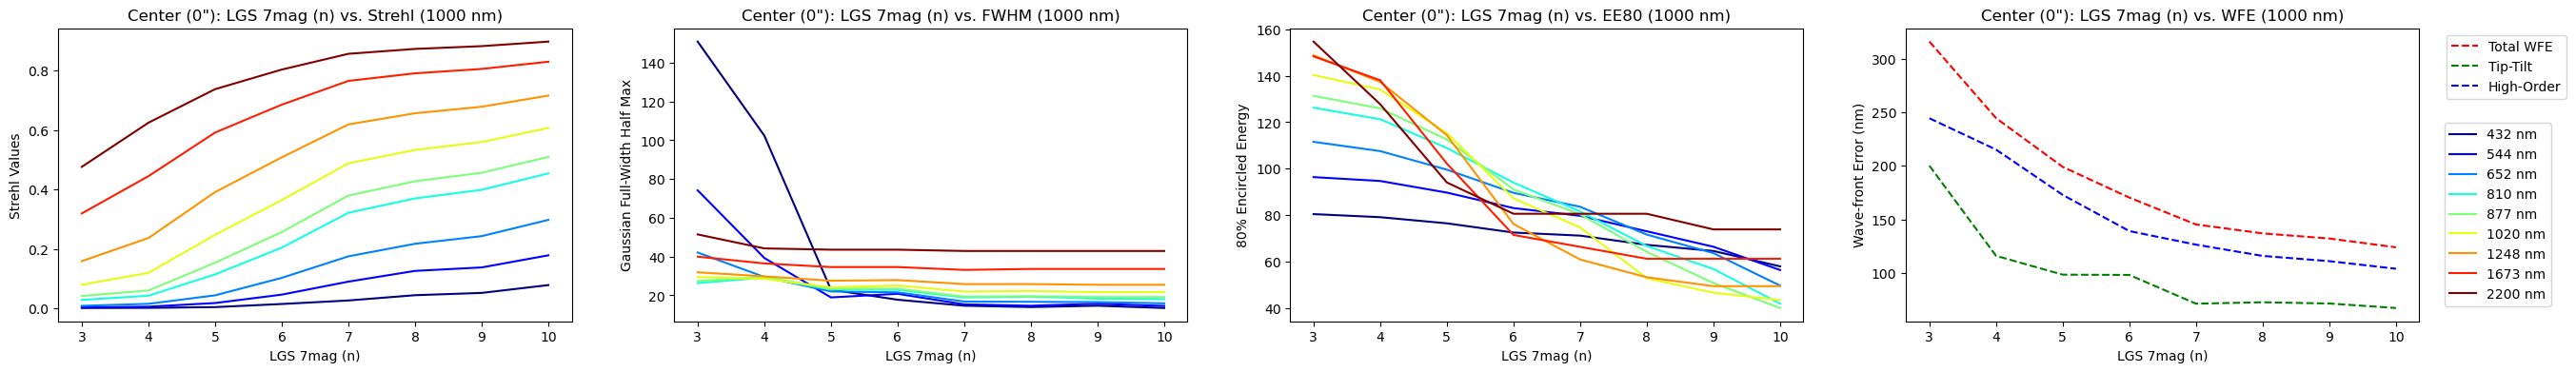

In [51]:
#Create separate lists

metrics = ["strehls", "fwhm", "ee80"]
metric_labels = ["Strehl Values", "Gaussian Full-Width Half Max", "80% Encircled Energy"] 

lgs_strehls = []
lgs_fwhm = []
lgs_ee80 = []
lgs_wfe = []

lgs = [3, 4, 5, 6, 7, 8, 9, 10]
wfe_colors = ["r", "g", "b"]
wfe_labels = ["Total WFE", "Tip-Tilt", "High-Order"]

for strehl3, strehl4, strehl5, strehl6, strehl7, strehl8, strehl9, strehl10 in zip(strehl_3[0], strehl_4[0], strehl_5[0], strehl_6[0], strehl_7[0], strehl_8[0], strehl_9[0], strehl_10[0]):
    lgs_strehls.append([strehl3, strehl4, strehl5, strehl6, strehl7, strehl8, strehl9, strehl10])

for fwhm3, fwhm4, fwhm5, fwhm6, fwhm7, fwhm8, fwhm9, fwhm10 in zip(fwhm_g_3[0], fwhm_g_4[0], fwhm_g_5[0], fwhm_g_6[0], fwhm_g_7[0], fwhm_g_8[0], fwhm_g_9[0], fwhm_g_10[0]):
    lgs_fwhm.append([fwhm3, fwhm4, fwhm5, fwhm6, fwhm7, fwhm8, fwhm9, fwhm10])

for ee803, ee804, ee805, ee806, ee807, ee808, ee809, ee8010 in zip(r_ee80_3[0], r_ee80_4[0], r_ee80_5[0], r_ee80_6[0], r_ee80_7[0], r_ee80_8[0], r_ee80_9[0], r_ee80_10[0]):
    lgs_ee80.append([ee803, ee804, ee805, ee806, ee807, ee808, ee809, ee8010])

for wfe3, wfe4, wfe5, wfe6, wfe7, wfe8, wfe9, wfe10 in zip(clos_xx_mean_nm_3[0], clos_xx_mean_nm_4[0], clos_xx_mean_nm_5[0], clos_xx_mean_nm_6[0], clos_xx_mean_nm_7[0], clos_xx_mean_nm_8[0], clos_xx_mean_nm_9[0], clos_xx_mean_nm_10[0]):
    lgs_wfe.append([wfe3, wfe4, wfe5, wfe6, wfe7, wfe8, wfe9, wfe10])

n_wvls = len(lgs_strehls)
colors = plt.cm.jet(np.linspace(0, 1, n_wvls))

n_wfe = len(lgs_wfe)

for i, metric in enumerate(metrics): 
    plt.figure(figsize=(8,8))
    
    for j in range(n_wvls):
        labels_psf = f'{w_3[0, j]*1e3:3.0f} nm'
        metric_data = locals()[f'lgs_{metric}'][j]
        plt.plot(lgs, metric_data, color=colors[j], label=labels_psf)
        
    plt.title(f'Center (0"): LGS 7mag (n) vs. {metric_labels[i]} (1000 nm)')
    plt.xlabel('LGS 7mag (n)')
    plt.ylabel(f'{metric_labels[i]}')
    plt.legend()

    #plt.savefig(f'actuator_study_plots/actuator_{metric}_center_1000nm.png', bbox_inches='tight', transparent=True)
    plt.close()

plt.figure(figsize=(8,8))
for i in range(n_wfe):
    labels_wfe = f'{wfe_labels[i]}' 
    plt.plot(lgs, lgs_wfe[i], label=wfe_labels[i], color=wfe_colors[i], linestyle='dashed')
    
plt.title('Center (0"): LGS 7mag (n) vs. WFE (1000 nm)')
plt.xlabel('LGS 7mag (n)')
plt.ylabel('Wave-front Error (nm)') 
plt.legend()
#plt.savefig(f'actuator_study_plots/actuator_wfe_center_1000nm.png', bbox_inches='tight', transparent=True)
plt.close()

#Create figure for actuator study
fig, ax = plt.subplots(1, 4, figsize=(32, 4))

for col_idx in range(n_wvls):
    labels_psf = f'{w_3[0, col_idx]*1e3:3.0f} nm'
    
    ax[0].plot(lgs, lgs_strehls[col_idx], label=labels_psf, color=colors[col_idx])
    ax[0].set_title('Center (0"): LGS 7mag (n) vs. Strehl (1000 nm)')
    ax[0].set_xlabel('LGS 7mag (n)')
    ax[0].set_ylabel('Strehl Values')
    
    ax[1].plot(lgs, lgs_fwhm[col_idx], label=labels_psf, color=colors[col_idx])
    ax[1].set_title('Center (0"): LGS 7mag (n) vs. FWHM (1000 nm)')
    ax[1].set_xlabel('LGS 7mag (n)')
    ax[1].set_ylabel('Gaussian Full-Width Half Max')
    
    ax[2].plot(lgs, lgs_ee80[col_idx], label=labels_psf, color=colors[col_idx])
    ax[2].set_title('Center (0"): LGS 7mag (n) vs. EE80 (1000 nm)')
    ax[2].set_xlabel('LGS 7mag (n)')
    ax[2].set_ylabel('80% Encircled Energy')

for col_idx in range(n_wfe):
    labels_wfe = f'{wfe_labels[col_idx]}' 

    ax[3].plot(lgs, lgs_wfe[col_idx], label=wfe_labels[col_idx], color=wfe_colors[col_idx], linestyle='dashed')
    ax[3].set_title('Center (0"): LGS 7mag (n) vs. WFE (1000 nm)')
    ax[3].set_xlabel('LGS 7mag (n)')
    ax[3].set_ylabel('Wave-front Error (nm)')

ax[2].legend(loc='upper right', bbox_to_anchor=(2.47, .7))
ax[3].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

#plt.savefig('actuator_study_plots/actuator_psf_total_center_1000nm.png', bbox_inches='tight', transparent=True)